## <div style="background:#ffcea0; padding:1rem 2rem">Project Info</div>

<div style="background:#cbe7da; font-size:1.7rem; line-height:1.5; padding:1rem">

- 
</div>

## <div style="background:#ffcea0; padding:1rem 2rem"> Loading and Preprocessing Data </div>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams["figure.figsize"] = [15,8]
plt.rcParams["axes.spines.top"] = False
plt.rcParams["axes.spines.left"] = False
plt.rcParams["axes.spines.right"] = False

from scipy import stats
from calendar import month_name, day_name

import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.graphics.factorplots import interaction_plot

import warnings
warnings.filterwarnings('ignore')

***Source of data is [here](https://archive.ics.uci.edu/ml/datasets/Absenteeism+at+work)***

In [2]:
df = pd.read_csv('dataset/Absenteeism_at_work_AAA/Absenteeism_at_work.csv',
                sep=';')
df.head()

,ID,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,...,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index,Absenteeism time in hours
0,11,26,7,3,1,289,36,13,33,239.554,...,0,1,2,1,0,1,90,172,30,4
1,36,0,7,3,1,118,13,18,50,239.554,...,1,1,1,1,0,0,98,178,31,0
2,3,23,7,4,1,179,51,18,38,239.554,...,0,1,0,1,0,0,89,170,31,2
3,7,7,7,5,1,279,5,14,39,239.554,...,0,1,2,1,1,0,68,168,24,4
4,11,23,7,5,1,289,36,13,33,239.554,...,0,1,2,1,0,1,90,172,30,2


In [3]:
df.shape

(740, 21)

In [4]:
## checking null values

df.isna().sum().sum()

0

In [5]:
## changing column names

df.columns = df.columns.str.strip().str.replace(' ', '_').str.lower()

df.columns

Index(['id', 'reason_for_absence', 'month_of_absence', 'day_of_the_week',
       'seasons', 'transportation_expense', 'distance_from_residence_to_work',
       'service_time', 'age', 'work_load_average/day', 'hit_target',
       'disciplinary_failure', 'education', 'son', 'social_drinker',
       'social_smoker', 'pet', 'weight', 'height', 'body_mass_index',
       'absenteeism_time_in_hours'],
      dtype='object')

In [6]:
# Basic metadata information

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 740 entries, 0 to 739
Data columns (total 21 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   id                               740 non-null    int64  
 1   reason_for_absence               740 non-null    int64  
 2   month_of_absence                 740 non-null    int64  
 3   day_of_the_week                  740 non-null    int64  
 4   seasons                          740 non-null    int64  
 5   transportation_expense           740 non-null    int64  
 6   distance_from_residence_to_work  740 non-null    int64  
 7   service_time                     740 non-null    int64  
 8   age                              740 non-null    int64  
 9   work_load_average/day            740 non-null    float64
 10  hit_target                       740 non-null    int64  
 11  disciplinary_failure             740 non-null    int64  
 12  education             

In [7]:
# Summary statistics

df.describe().T

,count,mean,std,min,25%,50%,75%,max
id,740.0,18.017568,11.021247,1.000,9.000,18.000,28.000,36.000
reason_for_absence,740.0,19.216216,8.433406,0.000,13.000,23.000,26.000,28.000
month_of_absence,740.0,6.324324,3.436287,0.000,3.000,6.000,9.000,12.000
day_of_the_week,740.0,3.914865,1.421675,2.000,3.000,4.000,5.000,6.000
seasons,740.0,2.544595,1.111831,1.000,2.000,3.000,4.000,4.000
transportation_expense,740.0,221.329730,66.952223,118.000,179.000,225.000,260.000,388.000
distance_from_residence_to_work,740.0,29.631081,14.836788,5.000,16.000,26.000,50.000,52.000
service_time,740.0,12.554054,4.384873,1.000,9.000,13.000,16.000,29.000
age,740.0,36.450000,6.478772,27.000,31.000,37.000,40.000,58.000
work_load_average/day,740.0,271.490235,39.058116,205.917,244.387,264.249,294.217,378.884


In [8]:
# make a copy of data for preprocessing

preprocessed_df = df.copy()

In [9]:
## Mapping categorical values in categorical features

month_map = dict(zip(range(1,13), month_name[1:13]))
day_map = dict(zip(range(2,7), day_name[:5]))
season_map = dict(zip([1,2,3,4], ['Spring', 'Summer', 'Fall', 'Winter']))
education_map = dict(zip([1,2,3,4], ['High_School', 'Graduate', 'Postgraduate', 'Master_Phd']))
yes_no_map = {0:'No', 1:'Yes'}


preprocessed_df.month_of_absence = preprocessed_df.month_of_absence.map(month_map)
preprocessed_df.day_of_the_week = preprocessed_df.day_of_the_week.map(day_map)
preprocessed_df.seasons = preprocessed_df.seasons.map(season_map)
preprocessed_df.education = preprocessed_df.education.map(education_map)
preprocessed_df.disciplinary_failure = preprocessed_df.disciplinary_failure.map(yes_no_map)
preprocessed_df.social_drinker = preprocessed_df.social_drinker.map(yes_no_map)
preprocessed_df.social_smoker = preprocessed_df.social_smoker.map(yes_no_map)


preprocessed_df.head()

,id,reason_for_absence,month_of_absence,day_of_the_week,seasons,transportation_expense,distance_from_residence_to_work,service_time,age,work_load_average/day,...,disciplinary_failure,education,son,social_drinker,social_smoker,pet,weight,height,body_mass_index,absenteeism_time_in_hours
0,11,26,July,Tuesday,Spring,289,36,13,33,239.554,...,No,High_School,2,Yes,No,1,90,172,30,4
1,36,0,July,Tuesday,Spring,118,13,18,50,239.554,...,Yes,High_School,1,Yes,No,0,98,178,31,0
2,3,23,July,Wednesday,Spring,179,51,18,38,239.554,...,No,High_School,0,Yes,No,0,89,170,31,2
3,7,7,July,Thursday,Spring,279,5,14,39,239.554,...,No,High_School,2,Yes,Yes,0,68,168,24,4
4,11,23,July,Thursday,Spring,289,36,13,33,239.554,...,No,High_School,2,Yes,No,1,90,172,30,2


- In the reason_for_absence feature only the 1-21 are listed in International code of disease (ICD). The remaining are not disease.

In [10]:
disease_arr = preprocessed_df.reason_for_absence.apply(lambda x: 'Yes' if x>=1 and x<=21 else 'No')

preprocessed_df.insert(loc=2, column='disease', value=disease_arr)

In [11]:
preprocessed_df.head()

,id,reason_for_absence,disease,month_of_absence,day_of_the_week,seasons,transportation_expense,distance_from_residence_to_work,service_time,age,...,disciplinary_failure,education,son,social_drinker,social_smoker,pet,weight,height,body_mass_index,absenteeism_time_in_hours
0,11,26,No,July,Tuesday,Spring,289,36,13,33,...,No,High_School,2,Yes,No,1,90,172,30,4
1,36,0,No,July,Tuesday,Spring,118,13,18,50,...,Yes,High_School,1,Yes,No,0,98,178,31,0
2,3,23,No,July,Wednesday,Spring,179,51,18,38,...,No,High_School,0,Yes,No,0,89,170,31,2
3,7,7,Yes,July,Thursday,Spring,279,5,14,39,...,No,High_School,2,Yes,Yes,0,68,168,24,4
4,11,23,No,July,Thursday,Spring,289,36,13,33,...,No,High_School,2,Yes,No,1,90,172,30,2


## <div style="background:#ffcea0; padding:1rem 2rem"> Univariate Analysis </div>

In [12]:
def plot_countplot(df, column, hue=None, order=None, figsize=(10,6)):
    plt.figure(figsize=figsize)
    g = sns.countplot(x=column, data=df, order=order, hue=hue)
    for rect in g.patches:
        h, w = rect.get_height(), rect.get_width()
        x, y = rect.get_x(), rect.get_y()
        if not pd.isna(h):
            plt.annotate(f'{int(h)}', (x + w / 2, y + h),
                        ha='center',
                        va='bottom',
                        fontsize=14,
                        color='k')
        else:
            pass
    plt.title(f"Count plot of feature -> {column}")
    plt.show()

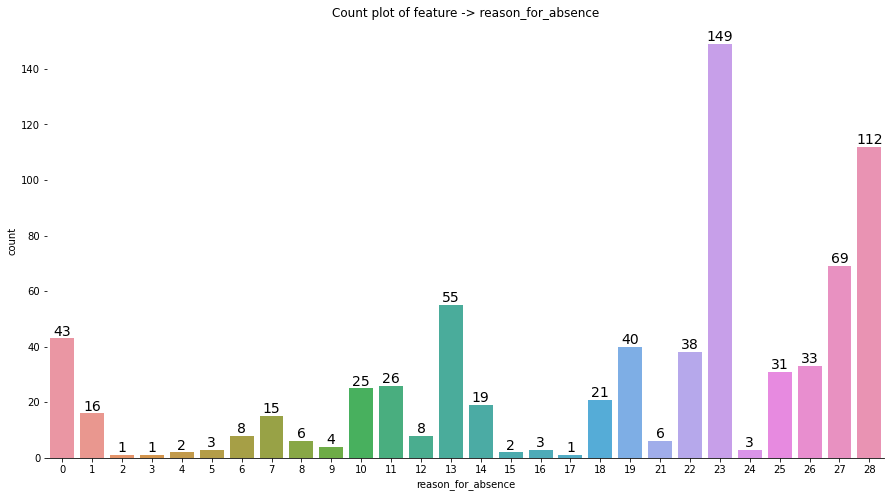

In [14]:
plot_countplot(df=preprocessed_df, column='reason_for_absence', figsize=(15,8))

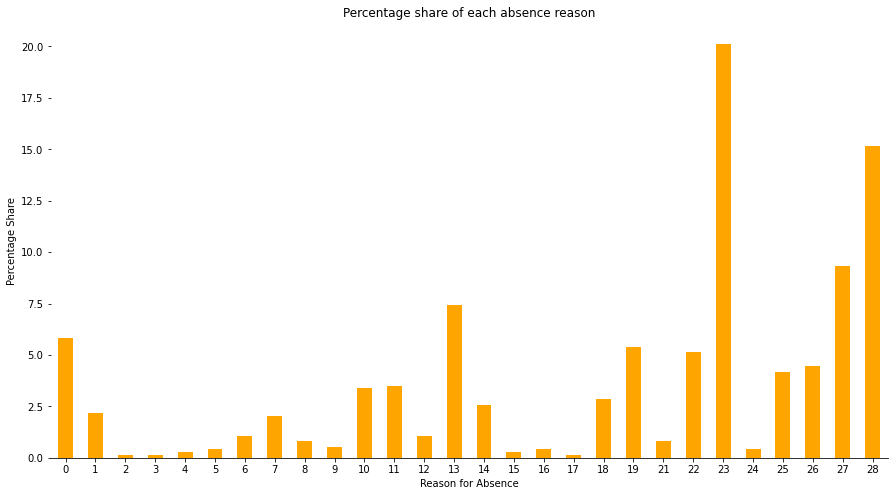

In [15]:
g = (preprocessed_df
     .reason_for_absence
     .value_counts(normalize=True)
     .mul(100)
     .sort_index()
     .plot.bar(rot=0, color="orange", title="Percentage share of each absence reason"))

plt.xlabel("Reason for Absence")
plt.ylabel("Percentage Share")
plt.show()

- Most common reason for absence is `medical consultation (23)` followed by `dental consultation (28)` with 20% and 15%.
- Top 5 reasons for absence are `medical consultation (23), dental consultation (28), physiotherapy (27), musculoskeletal system (13), Unknown (0)`.
- Only one reason out of top-5 is in the ICD disease table. 
- More than 57% of the data has reason for absence in top-5 reasons.

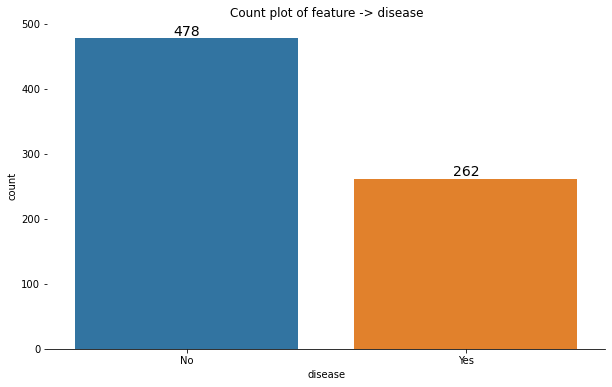

In [16]:
plot_countplot(df=preprocessed_df, column='disease')

In [17]:
preprocessed_df.disease.value_counts(normalize=True)

No     0.645946
Yes    0.354054
Name: disease, dtype: float64

- The number of reasons for absence that are not listed in the ICD table is almost twice the number of listed ones.

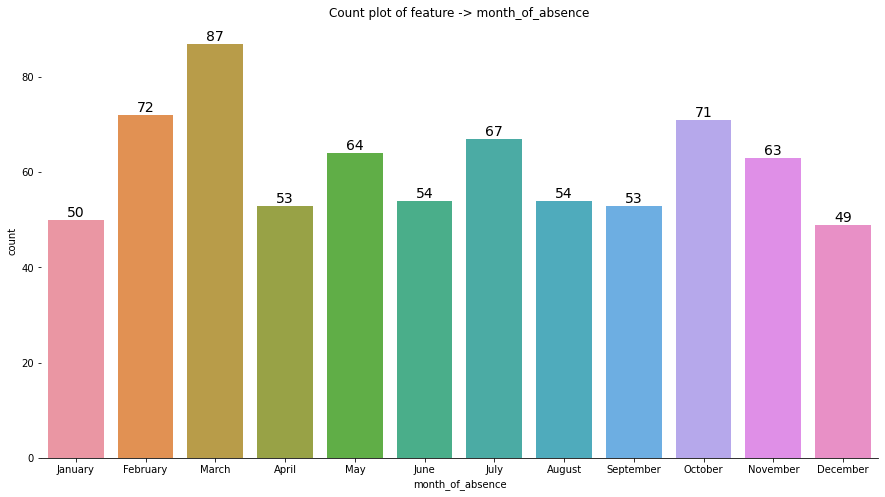

In [18]:
plot_countplot(df=preprocessed_df, 
               column="month_of_absence", 
               order=month_name[1:13], 
               figsize=(15,8))

- Month March has the highest number of absentees and December has the lowest.

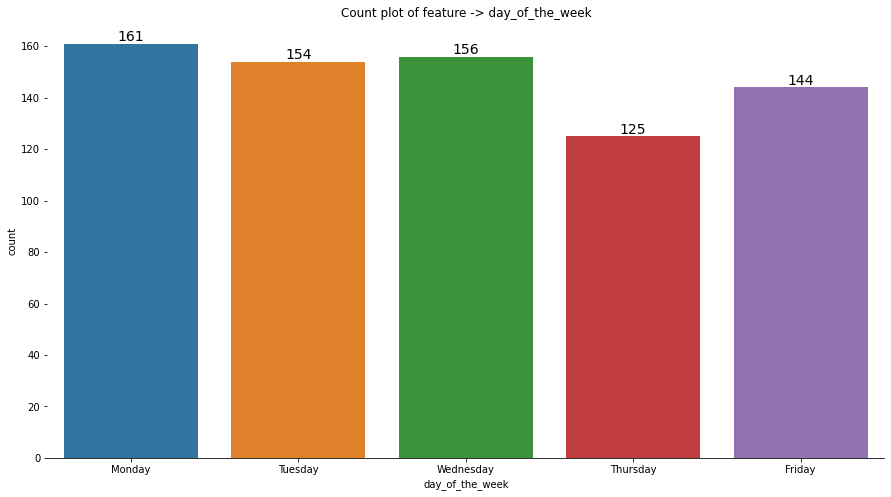

In [19]:
plot_countplot(preprocessed_df, 'day_of_the_week', 
               order=day_name[:5], figsize=(15,8))

- Thursday has the lowest number of data-points of absentees.

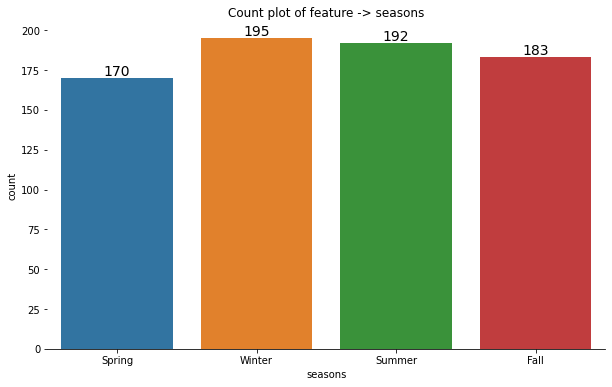

In [20]:
plot_countplot(preprocessed_df, 'seasons')

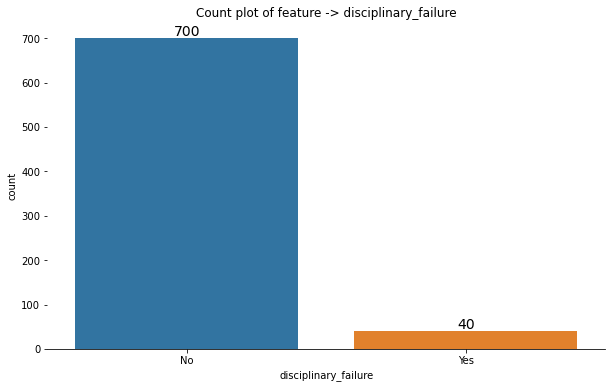

In [21]:
plot_countplot(preprocessed_df, 'disciplinary_failure')

In [22]:
preprocessed_df.disciplinary_failure.value_counts(normalize=True)

No     0.945946
Yes    0.054054
Name: disciplinary_failure, dtype: float64

- Only 5% of absentees have disciplinary failure

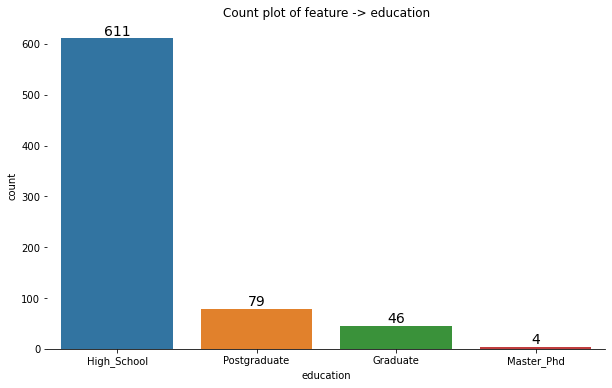

In [23]:
plot_countplot(preprocessed_df, 'education')

In [24]:
preprocessed_df.education.value_counts(normalize=True)

High_School     0.825676
Postgraduate    0.106757
Graduate        0.062162
Master_Phd      0.005405
Name: education, dtype: float64

- This result is highly skewed towards High School employees.
- One reason for this skewness could be that almost all business have more High-Schooled employees than higher educated employees.

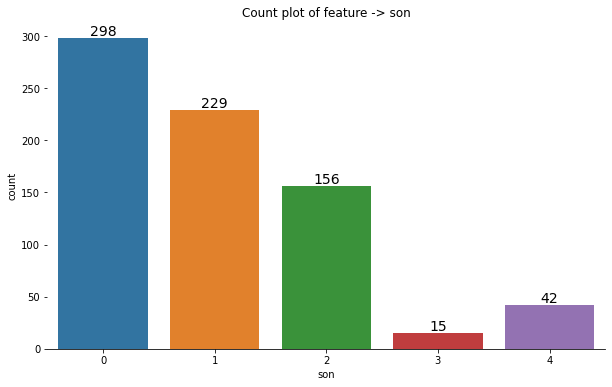

In [25]:
plot_countplot(preprocessed_df, 'son')

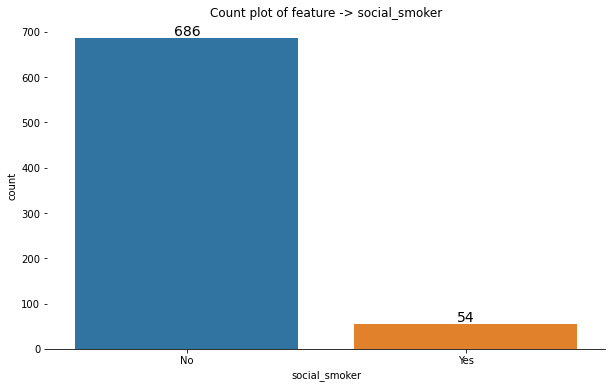

In [26]:
plot_countplot(preprocessed_df, 'social_smoker')

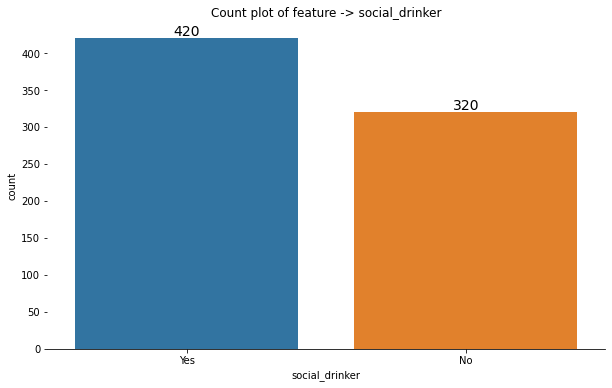

In [27]:
plot_countplot(preprocessed_df, 'social_drinker')

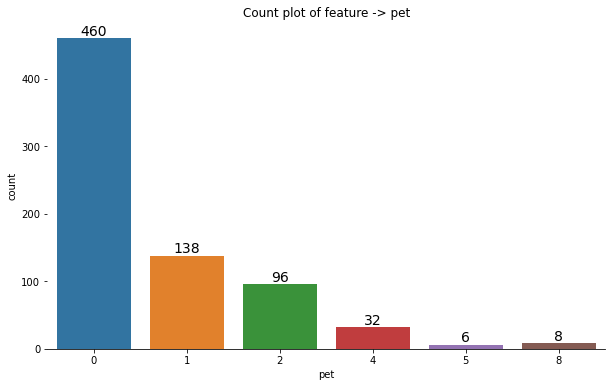

In [28]:
plot_countplot(preprocessed_df, 'pet')

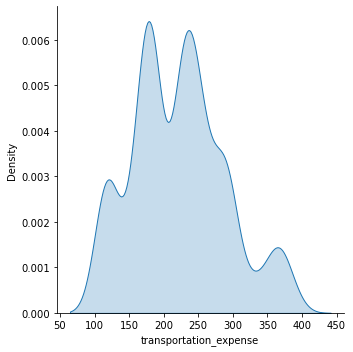

In [29]:
sns.displot(data=preprocessed_df, 
            x='transportation_expense', 
            kind='kde', fill=True)

plt.show()

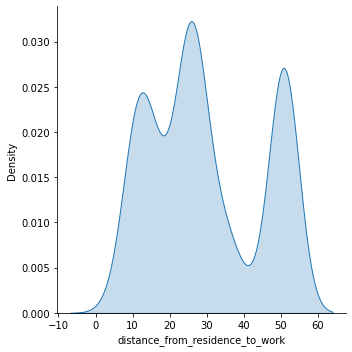

In [30]:
sns.displot(data=preprocessed_df, 
            x='distance_from_residence_to_work', 
            kind='kde', fill=True)
plt.show()

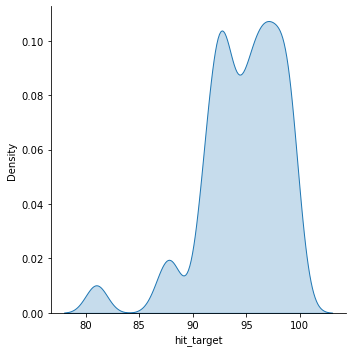

In [31]:
sns.displot(data=preprocessed_df, 
            x='hit_target', 
            kind='kde', fill=True)
plt.show()

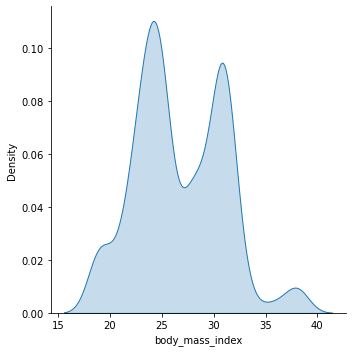

In [32]:
sns.displot(data=preprocessed_df, 
            x='body_mass_index', 
            kind='kde', fill=True)
plt.show()

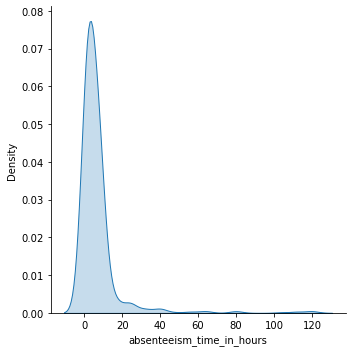

In [33]:
sns.displot(data=preprocessed_df, 
            x='absenteeism_time_in_hours', 
            kind='kde', fill=True)
plt.show()

- There are some outliers in the absenteeism hours feature

## <div style="background:#ffcea0; padding:1rem 2rem"> Analyzing Categorical Columns - Bivariate Analysis </div>

### <div style="background:#98baff; padding:1rem 2rem"> Reason for absence Vs Social Drinkers and Social Smokers </div>

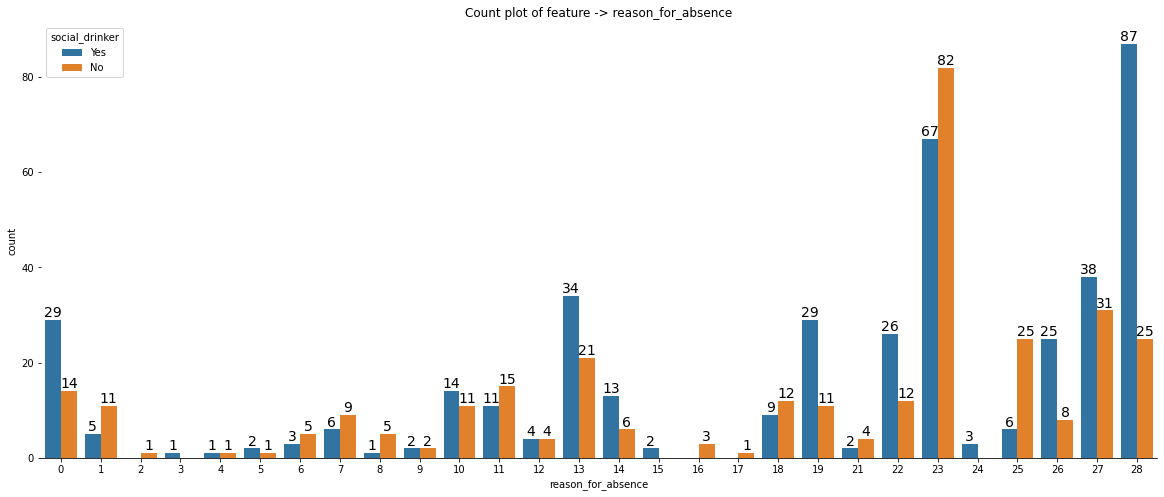

In [34]:
plot_countplot(preprocessed_df, "reason_for_absence", 
               hue="social_drinker", 
               figsize=(20,8))

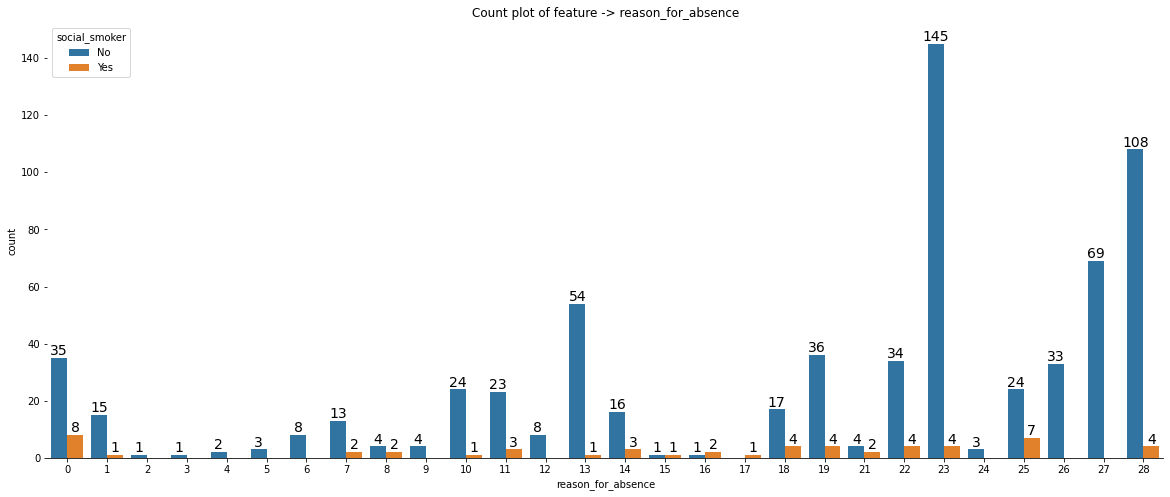

In [35]:
plot_countplot(preprocessed_df, "reason_for_absence", 
               hue="social_smoker", 
               figsize=(20,8))

In [36]:
preprocessed_df.social_drinker.value_counts(normalize=True)

Yes    0.567568
No     0.432432
Name: social_drinker, dtype: float64

In [37]:
preprocessed_df.social_smoker.value_counts(normalize=True)

No     0.927027
Yes    0.072973
Name: social_smoker, dtype: float64

- 56% employees are social drinkers and only 7% are social smoker
>As the number of social smokers is quite small (only 7% of the entries), it is very hard to say whether there is actually a relationship between the absence reasons and smoking. So we'll use the conditional probabilities for this relationship.

### <div style="background:#98baff; padding:1rem 2rem"> Conditional Probability </div>

In [38]:
# probability of being a social drinker and social smoker

probability = df[['social_drinker', 'social_smoker']].mean()
probability

social_drinker    0.567568
social_smoker     0.072973
dtype: float64

In [39]:
probability_of_social_drinker = probability[0]
probability_of_social_smoker = probability[1]

print(probability_of_social_drinker, probability_of_social_smoker)

0.5675675675675675 0.07297297297297298


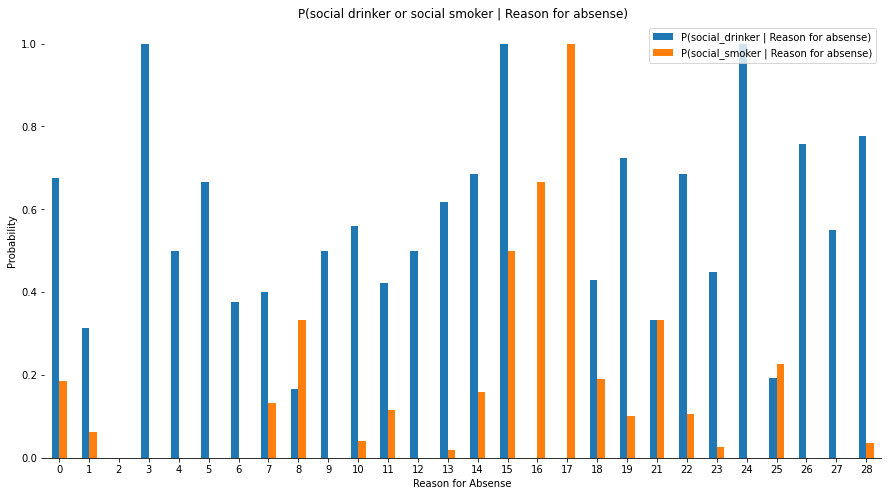

In [40]:
## probability--> P(Social Drinker | Absense for reason)

df1 = df.groupby('reason_for_absence')[['social_drinker', 'social_smoker']].agg('mean')

df1.plot.bar(figsize=(15, 8), rot=0)
plt.ylabel('Probability')
plt.xlabel("Reason for Absense")
plt.title('P(social drinker or social smoker | Reason for absense)')

plt.legend(labels=['P(social_drinker | Reason for absense)', 'P(social_smoker | Reason for absense)'])
plt.show()

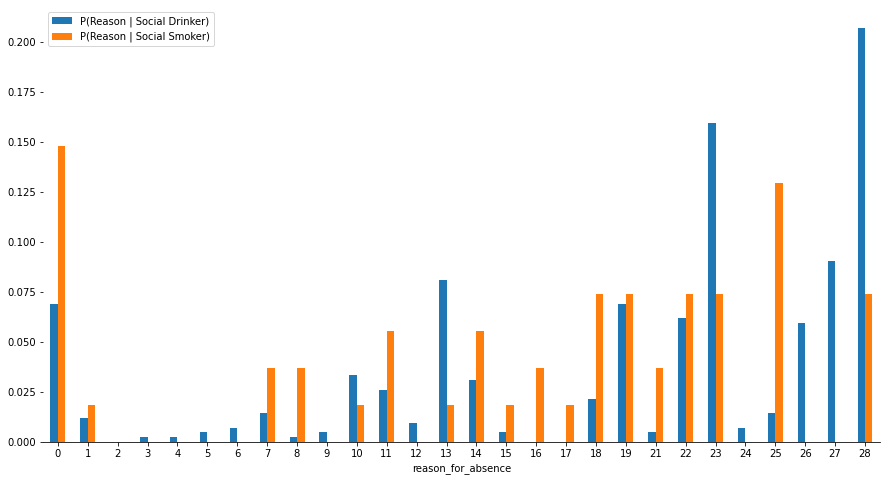

In [60]:
df1 = pd.crosstab(index=df.reason_for_absence, 
                  columns=df.social_drinker, 
                  normalize="columns")

df2 = pd.crosstab(index=df.reason_for_absence, 
                  columns=df.social_smoker, 
                  normalize="columns")

pd.DataFrame({'P(Reason | Social Drinker)':df1[1].tolist(),
             'P(Reason | Social Smoker)':df2[1]}).plot.bar(figsize=(15, 8), rot=0)

plt.show()

### <div style="background:#98baff; padding:1rem 2rem"> Reason and Disease vs absent hours </div>

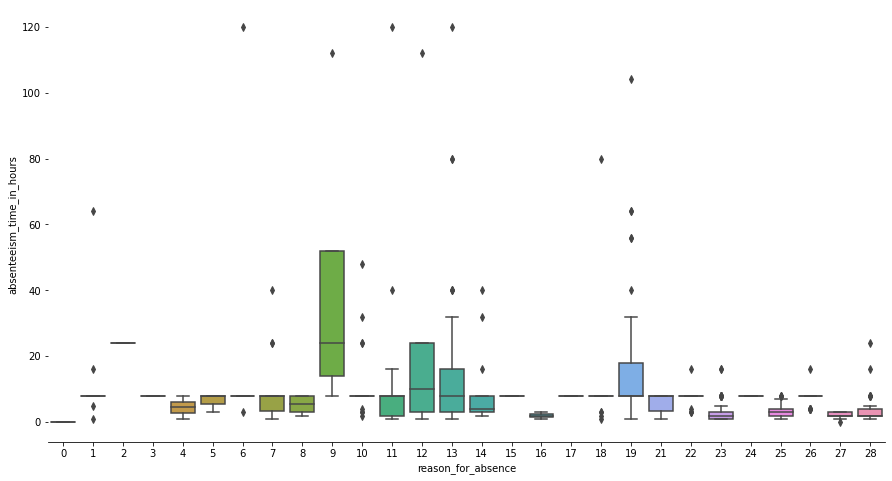

In [61]:
sns.boxplot(x='reason_for_absence', 
            y='absenteeism_time_in_hours', 
            data=preprocessed_df)
plt.show()

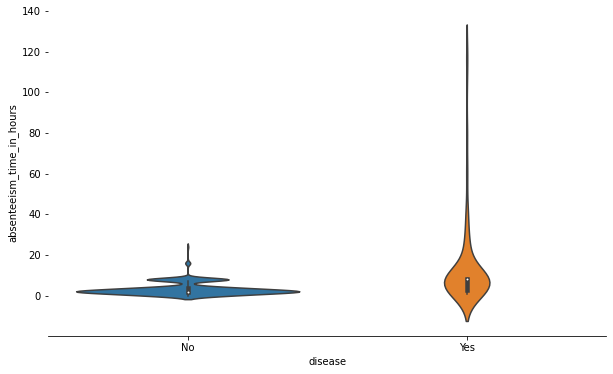

In [62]:
plt.figure(figsize=(10,6))
sns.violinplot(x='disease', 
               y='absenteeism_time_in_hours', 
               data=preprocessed_df)

plt.show()

- Distribution of disease and no_disease with absenteeism time seems pretty different.
- Let's check the hypothesis test for average hours

$
   \\ H_0 : \text{Average time of absenteeism is same for disease and no-disease}
   \\ H_a : \text{Average time is different}
$

In [45]:
disease_yes = preprocessed_df.loc[preprocessed_df.disease=='Yes']['absenteeism_time_in_hours']
disease_no = preprocessed_df.loc[preprocessed_df.disease=='No']['absenteeism_time_in_hours']

test_results = stats.ttest_ind(disease_yes, disease_no)

print(f"Test statistic: {test_results[0]:.3f}")
print(f"P-value: {test_results[1]:.3f}")

Test statistic: 10.708
P-value: 0.000


- As the p-value is less than 0.05 we can reject the null hypothesis and conclude that there is statistically significant difference between the average absent hours of person with disease and no disease.

- **The distribution also seems different. Let's check is by using Kolmogorov-Smirnov test.**

$
   \\ H_0 : \text{Both disease and no-disease are drawn from same distribution}
   \\ H_a : \text{Not drawn from same distribution}
$

In [46]:
test_results = stats.ks_2samp(disease_yes, disease_no)

print(f"Test statistic: {test_results[0]:.3f}")
print(f"P-value: {test_results[1]:.3f}")

Test statistic: 0.520
P-value: 0.000


- Yes, our test result shows that there is difference in distribution also.

### <div style="background:#98baff; padding:1rem 2rem"> Absence month and Absent Hours </div>

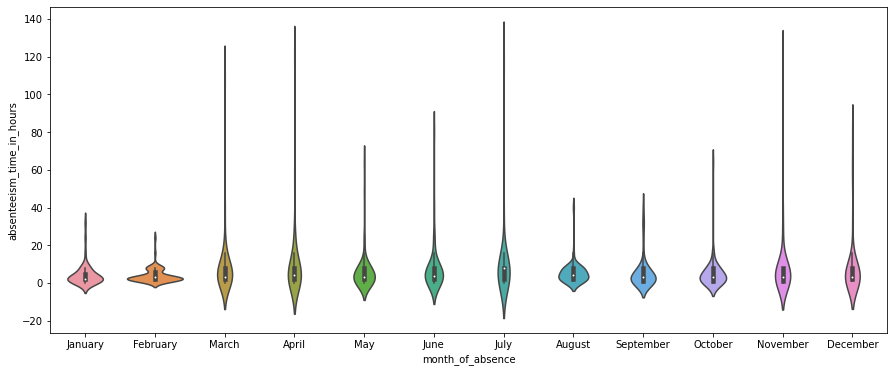

In [49]:
plt.figure(figsize=(15,6))
sns.violinplot(x='month_of_absence', y='absenteeism_time_in_hours', 
               data=preprocessed_df, order=month_name[1:13])
plt.show()

- Months March, April, July, and November have long hours of absent with some outliers. It means few employees had the very long hours of absenteeism.

- **One-way Anova test** - checking the impact of months on absenteeism hours

In [67]:
formula = 'absenteeism_time_in_hours ~ C(month_of_absence)'

data2 = preprocessed_df[['absenteeism_time_in_hours', 'month_of_absence']]

model = ols(formula, data=data2).fit()

anova_table = sm.stats.anova_lm(model, typ=1)
anova_table

,df,sum_sq,mean_sq,F,PR(>F)
C(month_of_absence),11.0,3250.407966,295.491633,1.674508,0.074833
Residual,725.0,127936.929890,176.464731,NaN,NaN


- The above result yields that month (alone) does not afftects the absenteeism hours 

In [68]:
## Anova assumptions tests

# 1. resiual follows the normal distribution
# Shaprio-wilks test

def shaprio_test(model=model):
    """
    Null hypothesis: data drawn from normal distribution
    """
    results = stats.shapiro(model.resid)
    
    if results[1]<0.05:
        print("Reject null hypothesis - Residual does not follow normal distribution 👎")
    else:
        print("Falied to reject the null hypothesis")
        print("Residuals Follow normal distribution 👌")


# 2. Homogeneity of variance
# if data drawn from normal distribution than we can use the Bartlett's test otherwise Levene's test


In [69]:
shaprio_test(model)

Reject null hypothesis - Residual does not follow normal distribution 👎


- **Two-way Anova test** for checking the impact of months and reasons on absenteeism hours

In [77]:
formula = 'absenteeism_time_in_hours ~ C(reason_for_absence) + C(month_of_absence) + C(reason_for_absence):C(month_of_absence)'

data2 = preprocessed_df[['absenteeism_time_in_hours', 'reason_for_absence', 'month_of_absence']]

model = ols(formula, data=data2).fit()

anova_table = sm.stats.anova_lm(model, typ=2)
anova_table

,sum_sq,df,F,PR(>F)
C(reason_for_absence),-9.027394e-07,27.0,-2.848851e-10,1.000000e+00
C(month_of_absence),3.929530e+03,11.0,3.043820e+00,6.153353e-03
C(reason_for_absence):C(month_of_absence),8.485775e+04,297.0,2.434479e+00,1.353672e-14
Residual,6.466668e+04,551.0,NaN,NaN


- Reason for absence does not affect the absent hours
- Month has significant effect on absent hours
- Interaction of both month and reason significantly affects the absent hours.

In [78]:
shaprio_test(model)

Reject null hypothesis - Residual does not follow normal distribution 👎


- **Two-way Anova test** for checking the impact of months and disease on absenteeism hours

In [79]:
formula2 = 'absenteeism_time_in_hours ~ C(disease) + C(month_of_absence) + C(disease):C(month_of_absence)'

data3 = preprocessed_df[['absenteeism_time_in_hours', 'disease', 'month_of_absence']]

model2 = ols(formula2, data=data3).fit()

anova_table2 = sm.stats.anova_lm(model2, typ=2)
anova_table2

,sum_sq,df,F,PR(>F)
C(disease),16422.379859,1.0,107.665112,1.375953e-23
C(month_of_absence),2123.578880,11.0,1.265653,2.400017e-01
C(disease):C(month_of_absence),2759.200926,11.0,1.644484,8.213924e-02
Residual,108755.349105,713.0,NaN,NaN


- Alone disease affects the absent hours but disease and month together does not affect it.

In [80]:
shaprio_test(model2)

Reject null hypothesis - Residual does not follow normal distribution 👎


In [111]:
preprocessed_df.groupby('month_of_absence')['absenteeism_time_in_hours'].agg(['mean', 'std'])

,mean,std
month_of_absence,,
April,9.094340,18.023771
August,5.333333,5.749487
December,8.448980,16.049482
February,4.083333,3.710472
January,4.440000,5.785838
July,10.955224,21.546590
June,7.611111,12.358507
March,8.793103,16.893055
May,6.250000,10.314114


In [113]:
# maximum average hours in july and minimum hours in february
# Hypothesis test

july_data = preprocessed_df.absenteeism_time_in_hours[preprocessed_df.month_of_absence=='July']

no_july_data = preprocessed_df.absenteeism_time_in_hours[~(preprocessed_df.month_of_absence=='July')]

## t-test for july month and remaining months
res = stats.ttest_ind(july_data, no_july_data)

print(f"Test statistic: {res[0]:.3f}\np-value: {res[1]:.3f}")

Test statistic: 2.605
p-value: 0.009


### <div style="background:#98baff; padding:1rem 2rem"> Analyzing Day of week </div>

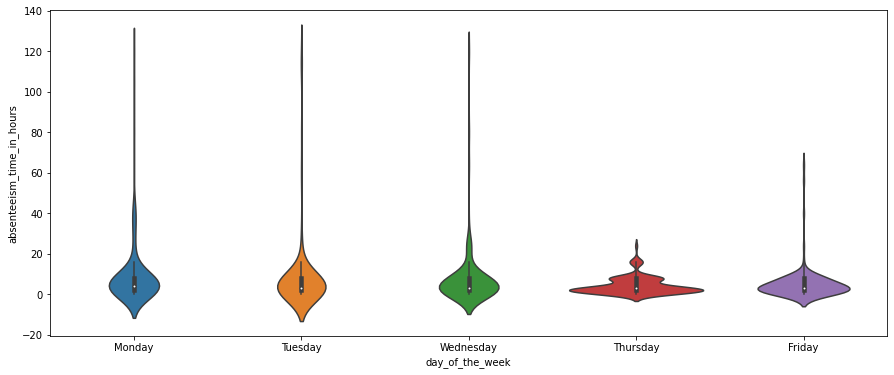

In [62]:
plt.figure(figsize=(15,6))
sns.violinplot(x='day_of_the_week', y='absenteeism_time_in_hours', 
               data=preprocessed_df, order=day_name[:5])
plt.show()

In [81]:
formula = 'absenteeism_time_in_hours ~ C(day_of_the_week)'

data2 = preprocessed_df[['absenteeism_time_in_hours', 'day_of_the_week']]

model = ols(formula, data=data2).fit()

anova_table = sm.stats.anova_lm(model, typ=1)
anova_table

,df,sum_sq,mean_sq,F,PR(>F)
C(day_of_the_week),4.0,2296.871518,574.217879,3.270822,0.011345
Residual,735.0,129034.890645,175.557674,NaN,NaN


- There is statistically significant difference between days of week

In [82]:
shaprio_test(model)

Reject null hypothesis - Residual does not follow normal distribution 👎


In [114]:
preprocessed_df.groupby('day_of_the_week')['absenteeism_time_in_hours'].agg(['mean', 'std'])

,mean,std
day_of_the_week,,
Friday,5.125000,7.911110
Monday,9.248447,15.972645
Thursday,4.424000,4.265889
Tuesday,7.980519,18.027383
Wednesday,7.147436,13.267863


In [115]:
# maximum average hours on monday and minimum hours on thursday
# Hypothesis test

thursday_data = preprocessed_df.absenteeism_time_in_hours[preprocessed_df.day_of_the_week=='Thursday']

no_thursday_data = preprocessed_df.absenteeism_time_in_hours[~(preprocessed_df.day_of_the_week=='Thursday')]

res1 = stats.ttest_ind(thursday_data, no_thursday_data)

print(f"Test statistic: {res1[0]:.3f}\np-value: {res1[1]:.3f}")

Test statistic: -2.307
p-value: 0.021


### <div style="background:#98baff; padding:1rem 2rem"> Analyzing Seasons </div>

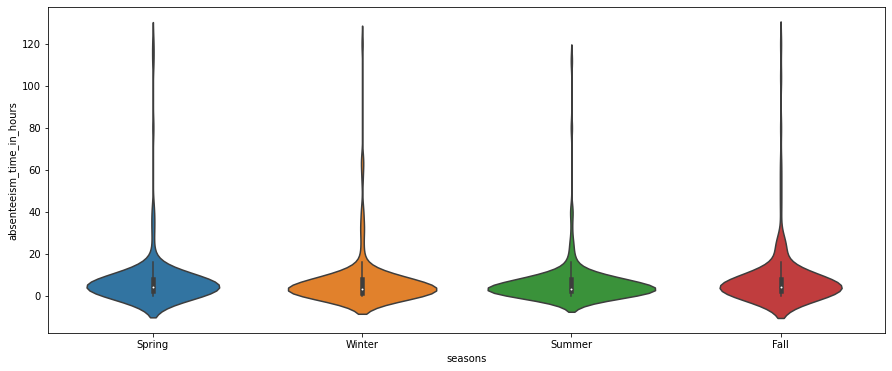

In [84]:
plt.figure(figsize=(15,6))
sns.violinplot(x='seasons', y='absenteeism_time_in_hours', 
               data=preprocessed_df)
plt.show()

- From the above figure it seems there is no difference among seasons for absent hours

In [88]:
## One-way anova test for reasons and seasons

formula = 'absenteeism_time_in_hours ~ C(seasons)'

data2 = preprocessed_df[['absenteeism_time_in_hours', 'seasons']]

model = ols(formula, data=data2).fit()

anova_table = sm.stats.anova_lm(model, typ=2)
anova_table

,sum_sq,df,F,PR(>F)
C(seasons),527.761700,3.0,0.989859,0.396957
Residual,130804.000462,736.0,NaN,NaN


In [89]:
shaprio_test(model)

Reject null hypothesis - Residual does not follow normal distribution 👎


In [90]:
## Two-way anova test for seasons

formula = 'absenteeism_time_in_hours ~ C(seasons) + C(reason_for_absence) + C(reason_for_absence):C(seasons)'

data2 = preprocessed_df[['absenteeism_time_in_hours','reason_for_absence', 'seasons']]

model = ols(formula, data=data2).fit()

anova_table = sm.stats.anova_lm(model, typ=1)
anova_table

,df,sum_sq,mean_sq,F,PR(>F)
C(seasons),3.0,527.761700,175.920567,1.304809,2.718241e-01
C(reason_for_absence),27.0,27586.562773,1021.724547,7.578167,8.351585e-25
C(reason_for_absence):C(seasons),81.0,15924.873693,196.603379,1.458214,7.792980e-03
Residual,654.0,88175.394426,134.824762,NaN,NaN


In [91]:
shaprio_test(model)

Reject null hypothesis - Residual does not follow normal distribution 👎


In [116]:
preprocessed_df.groupby('seasons')['absenteeism_time_in_hours'].agg(['mean', 'std'])

,mean,std
seasons,,
Fall,8.153005,15.148299
Spring,7.300000,14.496215
Summer,6.000000,11.059572
Winter,6.353846,12.469465


In [117]:
# maximum average hours on Fall and minimum hours on summer
# Hypothesis test

summer_data = preprocessed_df.absenteeism_time_in_hours[preprocessed_df.seasons=='Summer']

no_summer_data = preprocessed_df.absenteeism_time_in_hours[~(preprocessed_df.seasons=='Summer')]

res1 = stats.ttest_ind(summer_data, no_summer_data)

print(f"Test statistic: {res1[0]:.3f}\np-value: {res1[1]:.3f}")

Test statistic: -1.117
p-value: 0.265


### <div style="background:#98baff; padding:1rem 2rem"> Disciplinary Failure </div>

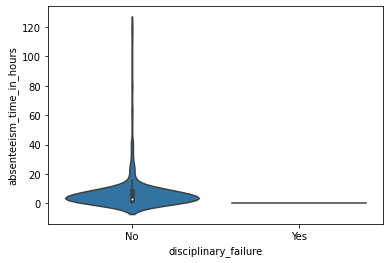

In [93]:
# plt.figure(figsize=(15,6))
sns.violinplot(x='disciplinary_failure', y='absenteeism_time_in_hours', 
               data=preprocessed_df)
plt.show()

In [17]:
preprocessed_df.disciplinary_failure.value_counts()

No     700
Yes     40
Name: disciplinary_failure, dtype: int64

In [18]:
preprocessed_df.groupby('disciplinary_failure')['absenteeism_time_in_hours'].agg(['mean', 'std'])

,mean,std
disciplinary_failure,,
No,7.32,13.600909
Yes,0.00,0.000000


- A significant difference is present in between absent hours for employees with disciplinary failure and not failure.

### <div style="background:#98baff; padding:1rem 2rem"> Analyzing social drinkers and social smokers </div>

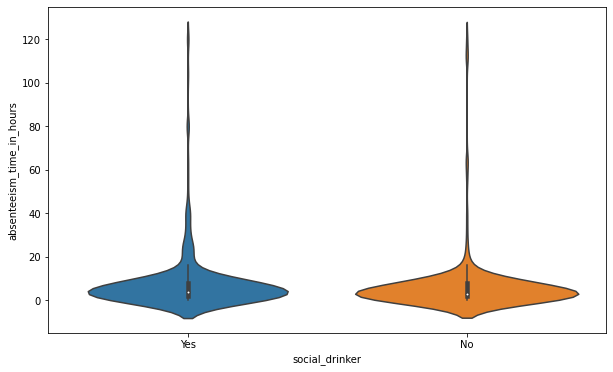

In [94]:
plt.figure(figsize=(10,6))
sns.violinplot(x='social_drinker', y='absenteeism_time_in_hours', data=preprocessed_df)
plt.show()

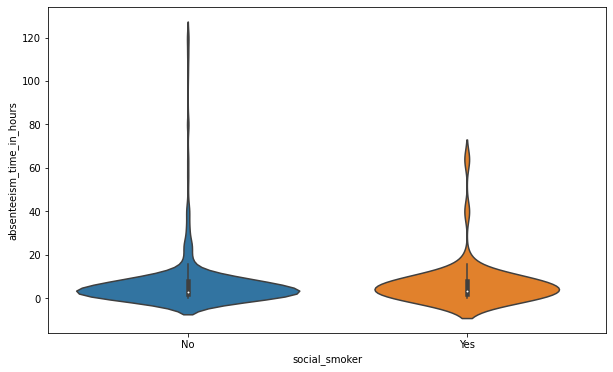

In [95]:
plt.figure(figsize=(10,6))
sns.violinplot(x='social_smoker', y='absenteeism_time_in_hours', data=preprocessed_df)
plt.show()

- Despite some differences in the outliers between smokers and non-smokers, there is no substantial difference in the distribution of absenteeism hours in drinkers and smokers.
- To assess this statement in a rigorous statistical way, perform hypothesis testing on the absenteeism hours (with a null hypothesis stating that the average absenteeism time in hours is the same for drinkers and non-drinkers)

In [96]:
hours_drinkers = preprocessed_df.absenteeism_time_in_hours[preprocessed_df.social_drinker=='Yes']
hours_non_drinkers = preprocessed_df.absenteeism_time_in_hours[preprocessed_df.social_drinker=='No']

In [97]:
result = stats.ttest_ind(hours_drinkers, hours_non_drinkers)

print("Test Statistic:", result[0])
print("p-value:", result[1])

Test Statistic: 1.7713833295243993
p-value: 0.07690961828294651


In [98]:
hours_smokers = preprocessed_df.absenteeism_time_in_hours[preprocessed_df.social_smoker=='Yes']
hours_non_smokers = preprocessed_df.absenteeism_time_in_hours[preprocessed_df.social_smoker=='No']

In [99]:
result = stats.ttest_ind(hours_smokers, hours_non_smokers)

print("Test Statistic:", result[0])
print("p-value:", result[1])

Test Statistic: -0.24277795417700243
p-value: 0.8082448720154971


- As we can see, the p-value of both tests is above the critical value of 0.05, which means that we cannot reject the null hypothesis. In other words, we cannot say that there is a statistically significant difference in the absenteeism hours between drinkers (and smokers) and non-drinkers (and non-smokers).

>  **Nevertheless, the average hours may still be equal, but their distributions may be different.**

- **To assess the difference in the distributions of two samples**

In [100]:
from scipy.stats import ks_2samp

In [101]:
drinkers_result = ks_2samp(hours_drinkers, hours_non_drinkers)
smokers_result = ks_2samp(hours_smokers, hours_non_smokers)

print(f"Dinkers' statistic is {drinkers_result[0]} and p-value {drinkers_result[1]}")
print(f"Smokers' statistic is {smokers_result[0]} and p-value {smokers_result[1]}")

Dinkers' statistic is 0.13541666666666666 and p-value 0.0022652445666854204
Smokers' statistic is 0.10436237987258395 and p-value 0.6069676330358527


- ***The p-value for the drinkers dataset is lower than the critical 0.05, which is strong evidence against the null hypothesis of the two distributions being equal. On the other hand, as the p-value for the smokers dataset is higher than 0.05, we cannot reject the null hypothesis.***

### <div style="background:#98baff; padding:1rem 2rem"> BMI Category </div>

In [102]:
def get_bmi_category(bmi):
    if bmi < 18.5:
        category = "underweight"
    elif bmi >= 18.5 and bmi < 25:
        category = "healthy weight"
    elif bmi >= 25 and bmi < 30:
        category = "overweight"
    else:
        category = "obese"
    return category


preprocessed_df['bmi_category'] = preprocessed_df.body_mass_index.apply(get_bmi_category)

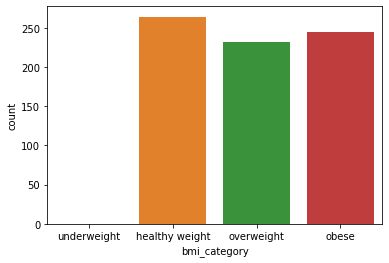

In [104]:
sns.countplot(x='bmi_category', data=preprocessed_df, 
              order=['underweight', 'healthy weight', 'overweight', 'obese'])
plt.show()

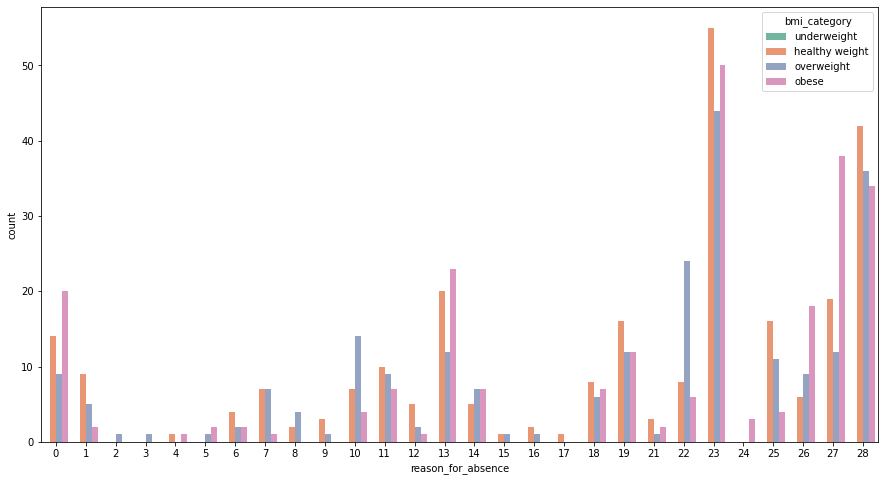

In [105]:
plt.figure(figsize=(15, 8))
sns.countplot(x='reason_for_absence', data=preprocessed_df, hue='bmi_category',
             hue_order=['underweight', 'healthy weight', 'overweight', 'obese'],
             palette='Set2')

plt.show()

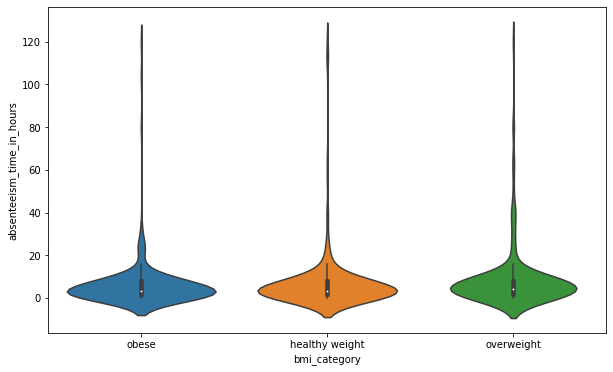

In [106]:
plt.figure(figsize=(10,6))
sns.violinplot(data=preprocessed_df, x='bmi_category', y='absenteeism_time_in_hours')
plt.show()

- bmi category does not affect the absenteeism hours

### <div style="background:#98baff; padding:1rem 2rem"> Education </div>

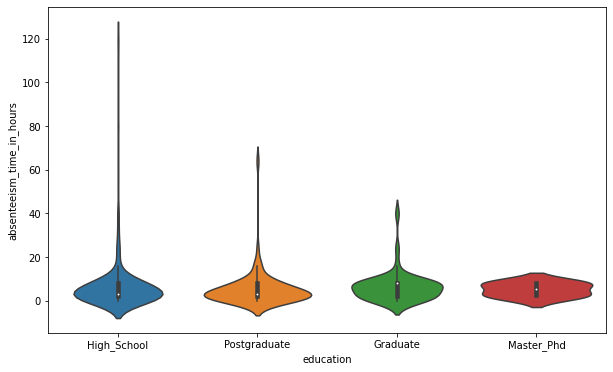

In [48]:
plt.figure(figsize=(10,6))
sns.violinplot(data=preprocessed_df, x='education', y='absenteeism_time_in_hours')
plt.show()

In [22]:
preprocessed_df.groupby('education')['absenteeism_time_in_hours'].agg(['count','mean', 'std'])

,count,mean,std
education,,,
Graduate,46,6.391304,6.754351
High_School,611,7.189853,14.258617
Master_Phd,4,5.250000,3.201562
Postgraduate,79,5.265823,7.962587


- We can clearly see that both the mean and standard deviation of the hours of absence are decreasing, meaning that highly educated employees tend to have shorter absences. Of course, a higher degree of education is not a cause for such a phenomenon and is more of an indication of it.
- Note that only 4 employees have phd degree.

## <div style="background:#ffcea0; padding:1rem 2rem"> Analyzing Numerical features </div>

### <div style="background:#98baff; padding:1rem 2rem"> Age </div>

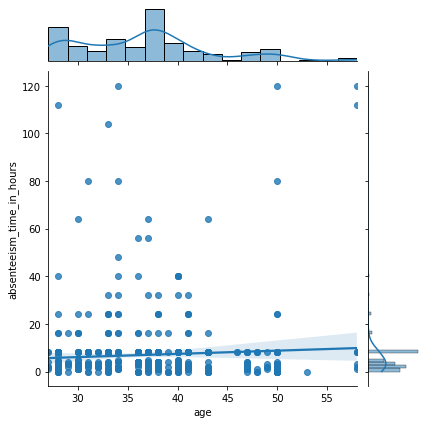

In [23]:
sns.jointplot(data=preprocessed_df, x='age', y='absenteeism_time_in_hours',
             kind='reg')
plt.show()

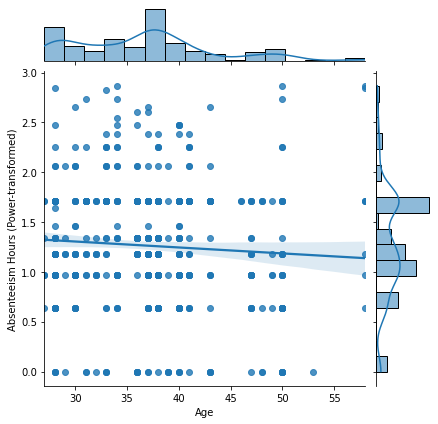

In [30]:
## Because the absent hours feature has outliers
## let's normalize it's distribution by using Power transformation method---> Box-Cox or Yeo-Johnson

# box-cox requires input data only positive
# yeo-johnson can take any data

hours = stats.yeojohnson(preprocessed_df.absenteeism_time_in_hours)[0]

g = sns.jointplot(x=preprocessed_df.age, y=hours, kind='reg')
g.set_axis_labels(xlabel="Age", ylabel="Absenteeism Hours (Power-transformed)")
plt.show()

In [35]:
print("Correlation Age and Absent Hours = ", preprocessed_df.age.corr(preprocessed_df.absenteeism_time_in_hours))
print("Correlation Age and Hours (Power Transformed) = ", preprocessed_df.age.corr(pd.Series(hours)))

Correlation Age and Absent Hours =  0.06575970132037087
Correlation Age and Hours (Power Transformed) =  -0.0678511300333822


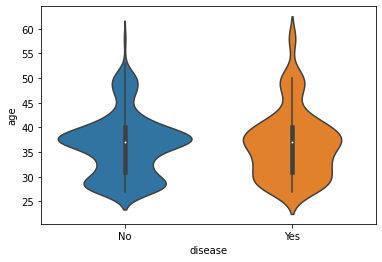

In [25]:
sns.violinplot(data=preprocessed_df, x='disease', y='age')
plt.show()

In [27]:
# hypothesis test for equality of means

age_disease = preprocessed_df.age[preprocessed_df.disease=='Yes']
age_no_disease = preprocessed_df.age[preprocessed_df.disease=='No']

test_result = stats.ttest_ind(age_disease, age_no_disease)

print('Test statistic', test_result[0])
print("p-value", test_result[1])


# distribution test

ks_result = stats.ks_2samp(age_disease, age_no_disease)

print('KS - Test statistic', ks_result[0])
print("KS - p-value", ks_result[1])

Test statistic 0.6297608872846625
p-value 0.5290459551429652
KS - Test statistic 0.056820722475965375
KS - p-value 0.6188353608928694


### <div style="background:#98baff; padding:1rem 2rem"> Transportation Costs and Distance to Work Factors </div>

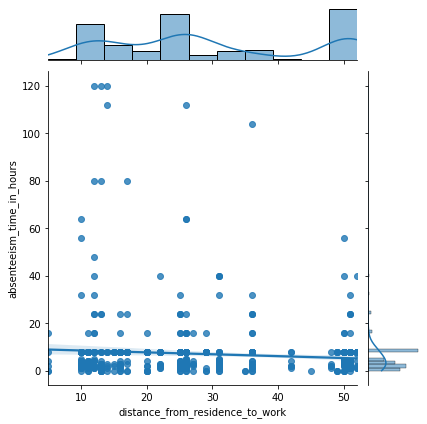

In [36]:
sns.jointplot(data=preprocessed_df, 
              x='distance_from_residence_to_work', 
              y='absenteeism_time_in_hours',
             kind='reg')
plt.show()

In [40]:
print("Correlation")
preprocessed_df.distance_from_residence_to_work.corr(preprocessed_df.absenteeism_time_in_hours)

Correlation


-0.08836282189613705

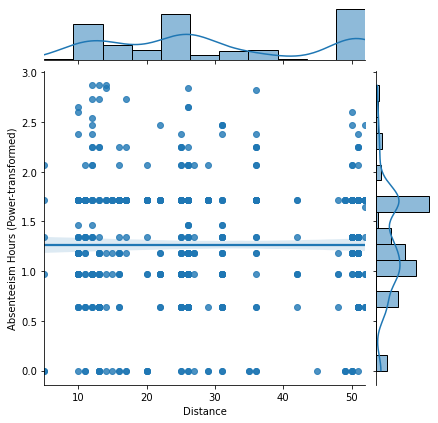

In [39]:
g = sns.jointplot(x=preprocessed_df.distance_from_residence_to_work, y=hours, kind='reg')
g.set_axis_labels(xlabel="Distance", ylabel="Absenteeism Hours (Power-transformed)")
plt.show()

In [49]:
pval, coef = stats.pearsonr(preprocessed_df.distance_from_residence_to_work, hours)

pval, coef

(-3.9679674787915876e-05, 0.9991402164258475)

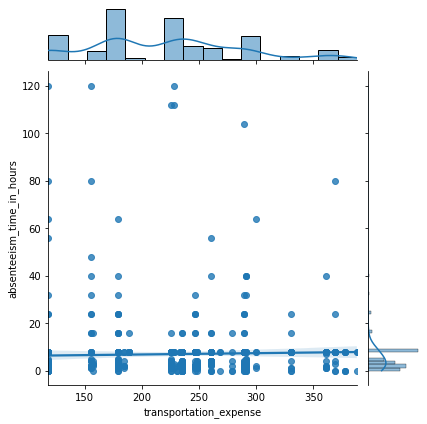

In [43]:
sns.jointplot(data=preprocessed_df, x='transportation_expense', y='absenteeism_time_in_hours',
             kind='reg')
plt.show()

In [46]:
preprocessed_df.distance_from_residence_to_work.corr(preprocessed_df.absenteeism_time_in_hours)

-0.08836282189613705

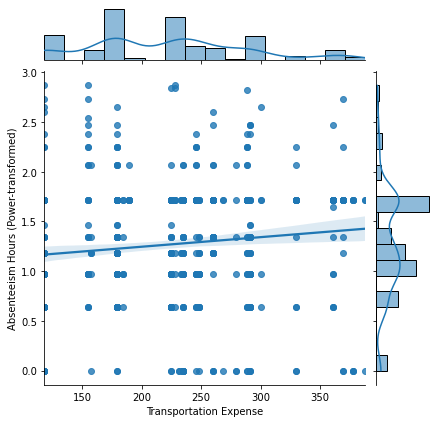

In [45]:
g = sns.jointplot(x=preprocessed_df.transportation_expense, y=hours, kind='reg')
g.set_axis_labels(xlabel="Transportation Expense", ylabel="Absenteeism Hours (Power-transformed)")
plt.show()

In [51]:
pval, coef = stats.pearsonr(preprocessed_df.transportation_expense, hours)

pval, coef

(0.11322535403105786, 0.002037022054604922)

- This result confirms that there is a slight positive correlation between Transportation expense and Absenteeism time in hours.

## <div style="background:#ffcea0; padding:1rem 2rem"> Summary </div>